In [1]:
import os
import torch
import torch.nn as nn
import torch.utils.data as Data
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 
import numpy as np 
from tqdm import tqdm
import talib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math 


In /Users/zed/.pyenv/versions/anaconda3-2020.11/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/zed/.pyenv/versions/anaconda3-2020.11/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/zed/.pyenv/versions/anaconda3-2020.11/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/zed/.pyenv/versions/anaconda3-2020.11/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be remove

In [2]:
path = "/Users/zed/AI_Lab/DoubleEnsembleML/Data/"
list = ["BTC","ETC",'ETH','FIL','LTC','XRP']
df = pd.read_csv(path +list[1]+".csv")

In [3]:
datas = [0]*6

In [4]:
for i in range(6):
    datas[i] = pd.read_csv(path +list[i]+".csv")
    if i==0:
        datas[i] = datas[i].loc[:,['Date','High','Low','Close','Volume (BTC)']].rename(columns = {'Volume (BTC)':'Volume'})
        
    if i>0:
        datas[i] = datas[i].rename(columns={'Last':'Close'})
        datas[i] = datas[i].drop(['Mid','Bid','Ask'],axis=1)
    datas[i]['Date'] = pd.to_datetime(datas[i]['Date'])
    datas[i] = datas[i].set_index('Date')

In [5]:
for i in range(6):
    print(datas[i].columns)

Index(['High', 'Low', 'Close', 'Volume'], dtype='object')
Index(['High', 'Low', 'Close', 'Volume'], dtype='object')
Index(['High', 'Low', 'Close', 'Volume'], dtype='object')
Index(['High', 'Low', 'Close', 'Volume'], dtype='object')
Index(['High', 'Low', 'Close', 'Volume'], dtype='object')
Index(['High', 'Low', 'Close', 'Volume'], dtype='object')


In [6]:
datas[0]

,High,Low,Close,Volume
Date,,,,
2014-01-07,892.06753,810.00000,810.00000,15.622378
2014-01-08,899.84281,788.00000,824.98287,19.182756
2014-01-09,870.00000,807.42084,841.86934,8.158335
2014-01-10,857.34056,817.00000,857.33056,8.024510
2014-01-11,918.05471,857.16554,899.84105,18.748285
...,...,...,...,...
2021-04-21,56805.50000,53600.00000,53815.20000,4788.013532
2021-04-22,55459.40000,50500.00000,51730.00000,10144.204074
2021-04-23,52124.40000,47549.30000,51178.70000,11159.243380


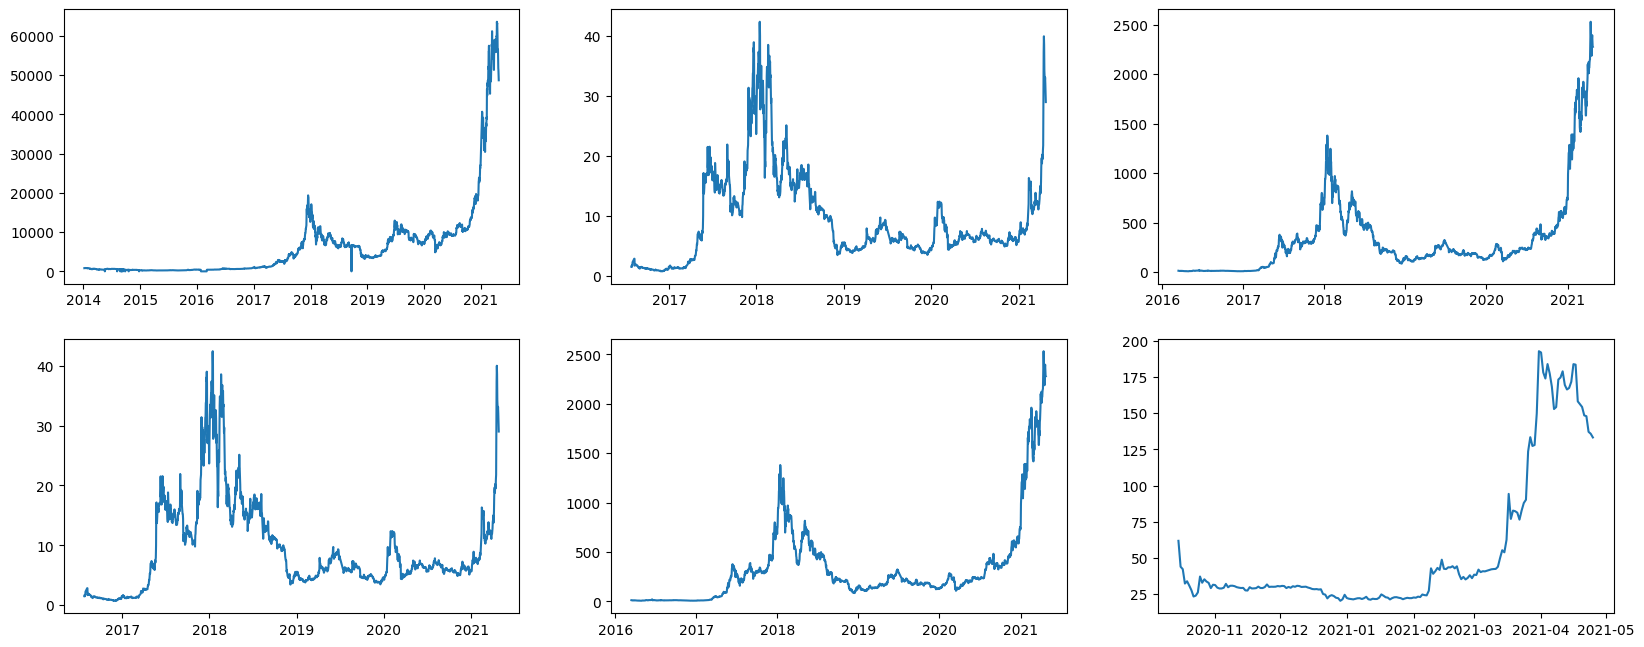

In [7]:
fig,ax = plt.subplots(2,3,figsize = (20,8),dpi = 100)
for i in range(2):
    for j in range(3):
        df = datas[i+j]
        # ax[i,j].set_xticklabels(rotation=45)
        ax[i,j].plot(df['Close'])
        

In [8]:
def cal_factor(dataset):
    dataset['Open'] = dataset['Close'].shift(-1)
    dataset['H-L'] = dataset['High'] - dataset['Low']
    # dataset['O-C'] = dataset['Close'] - dataset['Open']
    dataset['3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean()
    dataset['10day MA'] = dataset['Close'].shift(1).rolling(window = 10).mean()
    dataset['30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean()
    dataset['Std_dev']= dataset['Close'].rolling(5).std()
    dataset['RSI'] = talib.RSI(dataset['Close'].values, timeperiod = 9)
    dataset['ATR'] = talib.ATR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values, 7)
    dataset['Upperband'], dataset['Middleband'], dataset['Lowerband'] = talib.BBANDS(dataset['Close'].values, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
    # dataset['ADX'] = talib.ADX(dataset.High, dataset.Low, dataset.Close, timeperiod=14)
    for i in range(5):
        s = "Last "+str(i+1)+" Price"
        dataset[s] = dataset['Close'].shift(i+1)
    dataset['Target_value'] = (dataset.Close.shift(-1)-dataset.Close)/dataset.Close
    dataset['Target_tag'] = dataset.Target_value.apply(lambda x:1 if x>0 else 0)
    data  = dataset.dropna(how = "any")
    
    return data 
def sign(x):
    if x>0:
        return 1
    else: 
        return 0

In [9]:
datas_fa = [0]*6
for i in range(6):
    datas_fa[i] = cal_factor(cal_factor(datas[i]))
    datas_fa[i].to_csv('./data_factor/'+list[i]+'_fac.csv')

<ipython-input-8-5e2ab5a90d0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Open'] = dataset['Close'].shift(-1)
<ipython-input-8-5e2ab5a90d0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['H-L'] = dataset['High'] - dataset['Low']
<ipython-input-8-5e2ab5a90d0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [10]:
datas_fa[0]

,High,Low,Close,Volume,Open,H-L,3day MA,10day MA,30day MA,Std_dev,...,Upperband,Middleband,Lowerband,Last 1 Price,Last 2 Price,Last 3 Price,Last 4 Price,Last 5 Price,Target_value,Target_tag
Date,,,,,,,,,,,,,,,,,,,,,
2014-03-08,667.98953,623.00000,636.00880,4.199144,647.93490,44.98953,661.298203,624.213692,637.954088,22.648563,...,700.615663,660.100682,619.585701,636.20048,666.70413,680.99000,680.60000,666.94350,0.018751,1
2014-03-09,658.00000,629.05259,647.93490,2.017482,642.07570,28.94741,646.304470,629.087439,633.567420,19.787699,...,688.964973,653.567662,618.170351,636.00880,636.20048,666.70413,680.99000,680.60000,-0.009043,0
2014-03-10,684.50000,630.00000,642.07570,6.307648,641.00000,54.50000,640.048060,634.232300,631.361182,12.682942,...,668.472739,645.784802,623.096865,647.93490,636.00880,636.20048,666.70413,680.99000,-0.001675,0
2014-03-11,665.93423,560.00000,641.00000,18.486550,632.31094,105.93423,642.006467,641.045751,629.453620,4.913341,...,649.433227,640.643976,631.854725,642.07570,647.93490,636.00880,636.20048,666.70413,-0.013555,0
2014-03-12,660.00000,550.27500,632.31094,8.316095,653.39758,109.72500,643.670200,647.645751,627.853620,5.983995,...,650.570564,639.866068,629.161572,641.00000,642.07570,647.93490,636.00880,636.20048,0.033349,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-19,57594.70000,54228.90000,55720.00000,6649.986168,56500.00000,3365.80000,59260.000000,60524.450000,57960.256667,3277.850945,...,65212.198027,59348.600000,53485.001973,56239.80000,60085.20000,61455.00000,63243.00000,62969.00000,0.013999,1
2021-04-20,57110.40000,53388.30000,56500.00000,7804.231919,53815.20000,3722.10000,57348.333333,60285.450000,57881.203333,2589.970467,...,62633.080019,58000.000000,53366.919981,55720.00000,56239.80000,60085.20000,61455.00000,63243.00000,-0.047519,0
2021-04-21,56805.50000,53600.00000,53815.20000,4788.013532,51730.00000,3205.50000,56153.266667,59957.890000,57851.923333,2276.730403,...,60544.779158,56472.040000,52399.300842,56500.00000,55720.00000,56239.80000,60085.20000,61455.00000,-0.038747,0
